## Visualization 1

         day  ENTRIESn_hourly
0     Sunday       24130096.0
1     Monday       22997954.0
2    Tuesday       23562636.0
3  Wednesday       23486649.0
4   Thursday       23130773.0
5     Friday       14044105.0
6   Saturday       13180114.0


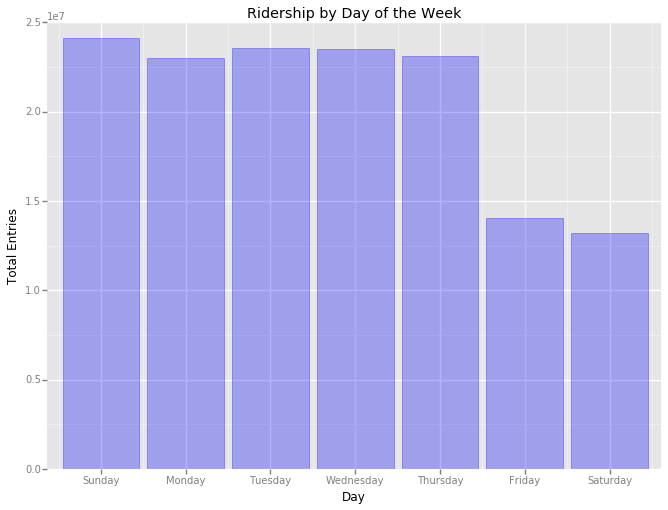

<ggplot: (17648676)>

In [3]:
import pandas as pd
from ggplot import *
import datetime

def plot_weather_data(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data we used in assignment #3.  
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.  

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
     
    To see all the columns and data points included in the turnstile_weather 
    dataframe. 
     
    However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''
    # to avoid a SettingWithCopyWarning
    pd.options.mode.chained_assignment = None
    
    day_of_week = lambda x: datetime.datetime.strptime(x, '%Y-%M-%d').strftime('%w')
    turnstile_weather['day'] = turnstile_weather['DATEn'].apply(day_of_week)
    turnstile_weather = turnstile_weather[['day','ENTRIESn_hourly']].groupby('day', as_index=False).sum()
    turnstile_weather['day'] = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
    
    print turnstile_weather
    plot = ggplot(turnstile_weather, aes(x='day', y='ENTRIESn_hourly')) + geom_bar(stat="identity", color='blue', \
        fill='blue', alpha=0.3) + xlab('Day') + ylab('Total Entries') + ggtitle('Ridership by Day of the Week')
    return plot

turnstile_weather = pd.read_csv('./data/turnstile_data_master_with_weather.csv')
%matplotlib inline
plot_weather_data(turnstile_weather)

## Make Another Visualization

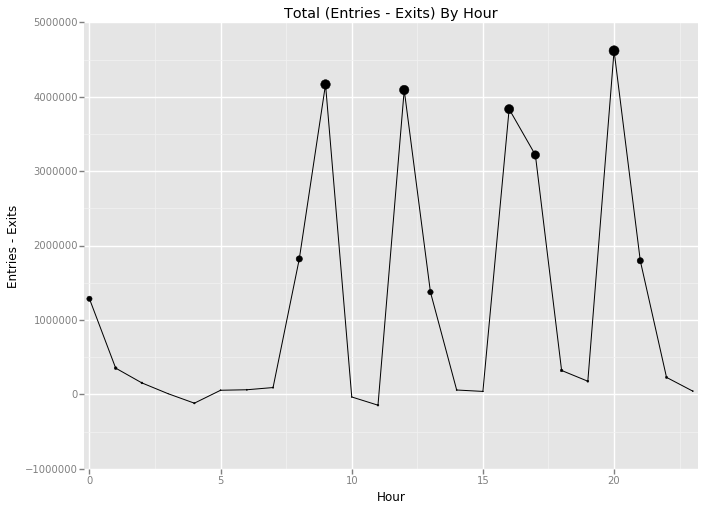

<ggplot: (17642177)>

In [4]:
import pandas as pd
from ggplot import *

def plot_weather_data(turnstile_weather):
    ''' 
    plot_weather_data is passed a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make another data visualization
    focused on the MTA and weather data we used in Project 3.
    
    Make a type of visualization different than what you did in the previous exercise.
    Try to use the data in a different way (e.g., if you made a lineplot concerning 
    ridership and time of day in exercise #1, maybe look at weather and try to make a 
    histogram in this exercise). Or try to use multiple encodings in your graph if 
    you didn't in the previous exercise.
    
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time-of-day or day-of-week
     * How ridership varies by subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out the link 
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    to see all the columns and data points included in the turnstile_weather 
    dataframe.
     
   However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''
    # to avoid a SettingWithCopyWarning
    pd.options.mode.chained_assignment = None
    
    turnstile_weather['entries_exits'] = turnstile_weather['ENTRIESn_hourly']-turnstile_weather['EXITSn_hourly']
    turnstile_weather = turnstile_weather[['Hour','entries_exits']].groupby('Hour',as_index=False).sum()
    plot = ggplot(turnstile_weather, aes(x='Hour',y='entries_exits')) \
        + geom_point(size=100*turnstile_weather['entries_exits'].abs()/turnstile_weather['entries_exits'].abs().max()) \
        + geom_line() + xlim(-0.2,23.2) + ylab('Entries - Exits') + ggtitle('Total (Entries - Exits) By Hour')
    return plot

turnstile_weather = pd.read_csv('./data/turnstile_data_master_with_weather.csv')
%matplotlib inline
plot_weather_data(turnstile_weather)